In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [4]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [5]:
test.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [6]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((80402, 6), (180, 3))

In [7]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.9977662505274131, 0.0022337494725869302)

In [8]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns, test.columns

(Index(['application_date', 'segment', 'branch_id', 'state', 'zone',
        'case_count'],
       dtype='object'),
 Index(['id', 'application_date', 'segment'], dtype='object'))

In [9]:
# show the data types for each column of the train set
train.dtypes

application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count          float64
dtype: object

In [10]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [11]:
# remove closed stores and those with no sales
train = train[(train['case_count'] != 0)]

# sales for the store number 1 (StoreType C)
sales = train.loc[:, ['application_date', 'case_count']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['application_date'] = pd.DatetimeIndex(sales['application_date'])
sales.dtypes

application_date    datetime64[ns]
case_count                 float64
dtype: object

In [12]:
sales = sales.rename(columns = {'application_date': 'ds',
                                'case_count': 'y'})
sales.head()

,ds,y
80401,2019-07-23,1984.0
80400,2019-07-22,1946.0
80399,2019-07-21,1028.0
80398,2019-07-20,1480.0
80397,2019-07-19,1886.0


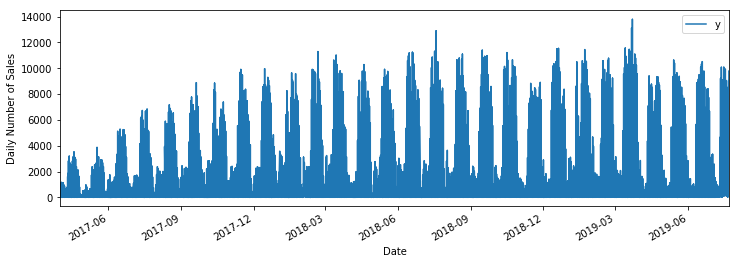

In [13]:
ax = sales.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

<Figure size 432x288 with 0 Axes>

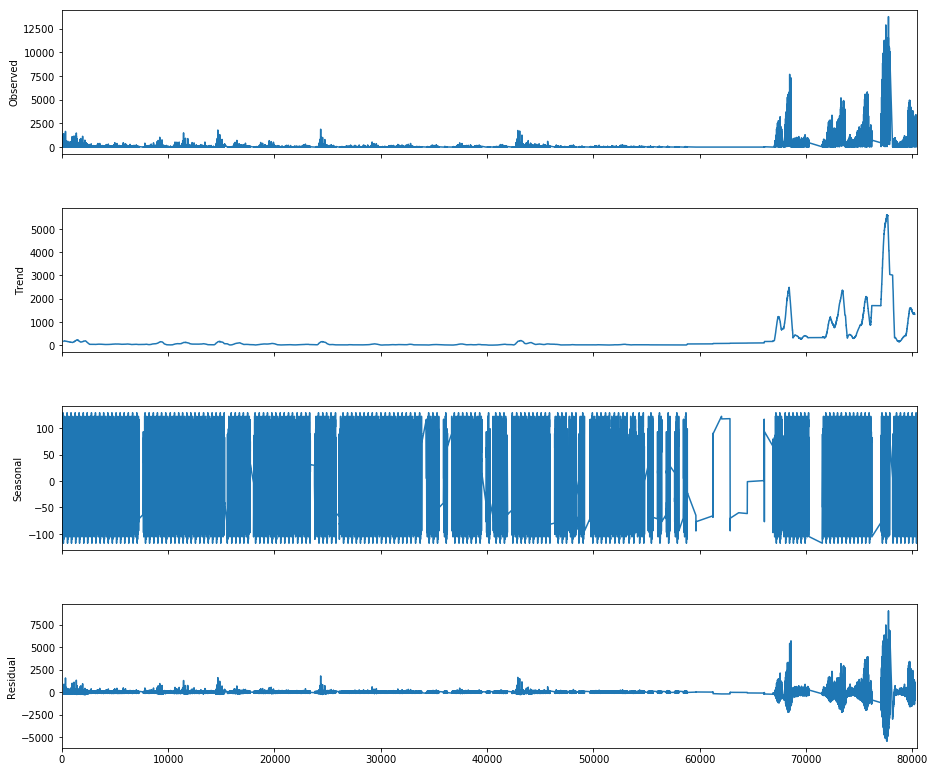

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales['y'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)